Sophia Ladyzhets, sal2213

Partner: Sally Green

## Temperature Modeling

### Objective:

Estimate difference in peak daily temperature between various weather stations in NYC and temperature readings in Central Park over a 6-8 month period. 

In [216]:
import requests
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt, dates as mdates
import datetime as datetime


In [217]:
%run WeatherData_Fxns_SAL.py

## Load data 

Sources: WU Stations and Central Park 

In [218]:
# wu_list = ['1421', '1622', '1238', '1626',
#            '1571', '1300', '1651', '1387', '982', '1615']
wu_list = ['1421', '1622', '1238', '1626',
           '1571', '1387', '982', '1615']
#note: removed stations 5 and 6 (and 9 temporarily)

first_day = '2022-03-01'
last_day = '2022-10-31'


In [219]:
data_0 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[0]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
                                                                                                                                                            # 'Wind Gust': str, 'Pressure': str,
                                                                                                                                                            # 'Precip.': str})
data_1 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[1]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_2 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[2]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_3 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[3]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_4 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[4]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
##temp load data_5 and data_6 as july only data since I don't have 8 mnths yet
# data_5 = data_1300
# data_6 = data_1651

data_5 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[5]+'_wunderground_'+first_day+'_'+last_day+'.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_6 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[6]+'_wunderground_'+first_day+'_'+'2022-08-16.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})
data_7 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[7]+'_wunderground_'+first_day+'_'+'2022-03-10.csv', converters={'Dew Point': str, 'Humidity': str, 'Speed': str})

data_0.dtypes


c:\Users\sophi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Time               object
Temperature        object
Dew Point          object
Humidity           object
Wind               object
Speed              object
Gust               object
Pressure           object
Precip. Rate.      object
Precip. Accum.     object
UV                float64
Solar              object
Date               object
dtype: object

In [220]:
# weather_data_list = [data_0, data_1, data_2, data_3,
#                      data_4, data_5, data_6, data_7, data_8, data_9]

weather_data_list = [data_0, data_1, data_2, data_3,
                     data_4, data_5, data_6, data_7]

for i in range(len(weather_data_list)):
    weather_data_list[i] = weather_data_list[i].replace(to_replace='--', value=np.nan)
    weather_data_list[i] = weather_data_list[i].replace(to_replace='  ', value=np.nan)
    weather_data_list[i] = weather_data_list[i].dropna(thresh=3)
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].str.strip(' \xa0°F')
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].astype(float)
    weather_data_list[i]['Speed'] = weather_data_list[i]['Speed'].str.strip(' °mph,')
    # print(weather_data_list[i]['Speed'])
    # weather_data_list[i]['Speed'] = weather_data_list[i]['Speed'].astype(float)
  


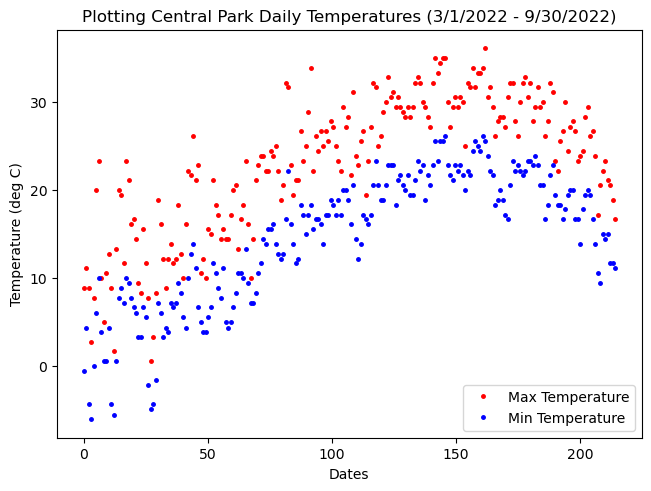

In [221]:
central_park = pd.read_csv('Central Park Weather Data March to Sept 2022.csv')

central_park = central_park.replace(to_replace='--', value=np.nan)
central_park = central_park.dropna(thresh=3)

T_min_ctrl = central_park['TMIN']
x_min_ctrl = np.linspace(0.0, T_min_ctrl.shape[0], T_min_ctrl.shape[0])
T_max_ctrl = central_park['TMAX']
x_max_ctrl = np.linspace(0.0, T_max_ctrl.shape[0], T_max_ctrl.shape[0])

#plotting central park weather data
fig = plt.figure(constrained_layout = True)
ax = plt.gca()
ax.plot(x_max_ctrl, T_max_ctrl, 'ro', markersize=2.5, label='Max Temperature')  ##close to Central Park (uptown - Harlem)
ax.plot(x_min_ctrl, T_min_ctrl, 'bo', markersize=2.5, label='Min Temperature')  ##close to Central Park (uptown - Harlem)
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg C)")
ax.set_title('Plotting Central Park Daily Temperatures (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()


### Preliminary Analysis
Calculate min and max daily temperatures for WU stations

In [236]:
#calculating min and max temp per day from WU data

weather_data_list[0]['Temperature']
weather_data_list[0]['Date']
weather_data_list[0].dtypes

#reference: https://github.com/arvindnswamy/IntroToPythonForMEstudents/blob/main/IntroductionToPython_PandasNumpyScipyMatplotlib.ipynb

wd_avgdailytemp_list = []
wd_mindailytemp_list = []
wd_maxdailytemp_list = []

for i in range(len(weather_data_list)):
    wd_dailytemp_avg = weather_data_list[i].groupby(by=['Date']).mean(['Temperature'])
    wd_dailytemp_min = weather_data_list[i].groupby(by=['Date']).min(['Temperature'])
    wd_dailytemp_max = weather_data_list[i].groupby(by=['Date']).max(['Temperature'])
    wd_dailytemp_avg[:] = (wd_dailytemp_avg[:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_min[:] = (wd_dailytemp_min[:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_max[:] = (wd_dailytemp_max[:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_max = wd_dailytemp_max.assign(DATE=wd_dailytemp_max.axes[0])
    wd_avgdailytemp_list.append(wd_dailytemp_avg)
    wd_mindailytemp_list.append(wd_dailytemp_min)
    wd_maxdailytemp_list.append(wd_dailytemp_max)

print(wd_maxdailytemp_list[0])


            Temperature  Precip. Rate.  Precip. Accum.  UV        DATE
Date                                                                  
2022-03-01     9.000000            NaN             NaN NaN  2022-03-01
2022-03-02    13.166667            NaN             NaN NaN  2022-03-02
2022-03-03     9.333333            NaN             NaN NaN  2022-03-03
2022-03-04     4.444444            NaN             NaN NaN  2022-03-04
2022-03-05     6.666667            NaN             NaN NaN  2022-03-05
...                 ...            ...             ...  ..         ...
2022-10-27    22.944444            NaN             NaN NaN  2022-10-27
2022-10-28    12.666667            NaN             NaN NaN  2022-10-28
2022-10-29    14.055556            NaN             NaN NaN  2022-10-29
2022-10-30    19.833333            NaN             NaN NaN  2022-10-30
2022-10-31    20.166667            NaN             NaN NaN  2022-10-31

[245 rows x 5 columns]


### Comparing Trends

Temperature difference between WU stations and Central Park

In [237]:
#calculating min and max temp per day from WU data

weather_data_list[0]['Temperature']
weather_data_list[0]['Date']
weather_data_list[0].dtypes

#reference: https://github.com/arvindnswamy/IntroToPythonForMEstudents/blob/main/IntroductionToPython_PandasNumpyScipyMatplotlib.ipynb

wd_maxdailytemp_list = []

for i in range(len(weather_data_list)):
    wd_dailytemp_max = weather_data_list[i].groupby(by=['Date']).max(['Temperature'])
    wd_dailytemp_max[:] = (wd_dailytemp_max[:] - 32.0 )*(5.0/9.0) 
    wd_dailytemp_max = wd_dailytemp_max.assign(DATE=wd_dailytemp_max.axes[0])
    wd_dailytemp_max = wd_dailytemp_max.rename(columns={'Temperature': 'T_max'+wu_list[i]})

    wd_maxdailytemp_list.append(wd_dailytemp_max)

print(wd_maxdailytemp_list[0])


            T_max1421  Precip. Rate.  Precip. Accum.  UV        DATE
Date                                                                
2022-03-01   9.000000            NaN             NaN NaN  2022-03-01
2022-03-02  13.166667            NaN             NaN NaN  2022-03-02
2022-03-03   9.333333            NaN             NaN NaN  2022-03-03
2022-03-04   4.444444            NaN             NaN NaN  2022-03-04
2022-03-05   6.666667            NaN             NaN NaN  2022-03-05
...               ...            ...             ...  ..         ...
2022-10-27  22.944444            NaN             NaN NaN  2022-10-27
2022-10-28  12.666667            NaN             NaN NaN  2022-10-28
2022-10-29  14.055556            NaN             NaN NaN  2022-10-29
2022-10-30  19.833333            NaN             NaN NaN  2022-10-30
2022-10-31  20.166667            NaN             NaN NaN  2022-10-31

[245 rows x 5 columns]


In [238]:
central_park.head()
central_park.keys()
# central_park.axes
# central_park['TMAX'].keys()
# df_ctrl = central_park.groupby(by=['DATE'])
# df_ctrl.head()
# df_wdtemp.assign(T_max_ctrl=central_park['DATE'])
df_combo = pd.merge(wd_maxdailytemp_list[0], central_park, how='inner', on=['DATE'])
df_combo = df_combo.drop(['PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMIN_ATTRIBUTES',
                          'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
                          'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
                          'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
                          'WT04_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES'], axis=1)

df_combo = df_combo.rename(columns={'TMAX':'T_max_ctrl'})
df_combo = df_combo.assign(Tdif0=df_combo['T_max'+wu_list[0]]-df_combo['T_max_ctrl'])
df_combo = df_combo.rename(columns={'Tdif0':'T_dif'+wu_list[0]})
for i in range(1, len(wd_maxdailytemp_list)-1):
    df_combo = pd.merge(df_combo, wd_maxdailytemp_list[i], how='inner', on=['DATE'])
    df_combo = df_combo.assign(Tdif=df_combo['T_max'+wu_list[i]]-df_combo['T_max_ctrl'])
    df_combo = df_combo.rename(columns={'Tdif':'T_dif'+wu_list[i]})
# df_combo = df_combo.drop(['Precip. Rate._x', 'Precip. Accum._x', 'Precip. Rate._y',
#        'Precip. Accum._y'], axis=1)
df_combo.keys()


c:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UV_x'} in the result is deprecated and will raise a MergeError in a future version.


Index(['T_max1421', 'Precip. Rate.', 'Precip. Accum.', 'UV_x', 'DATE',
       'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'TAVG',
       'TAVG_ATTRIBUTES', 'T_max_ctrl', 'TMAX_ATTRIBUTES', 'TMIN', 'T_dif1421',
       'T_max1622', 'UV_y', 'T_dif1622', 'T_max1238', 'UV_x', 'T_dif1238',
       'T_max1626', 'UV_y', 'High', 'Low', 'Average', 'T_dif1626', 'T_max1571',
       'UV_x', 'T_dif1571', 'T_max1387', 'UV_y', 'T_dif1387', 'T_max982', 'UV',
       'T_dif982'],
      dtype='object')

In [239]:
df_combo


,T_max1421,Precip. Rate.,Precip. Accum.,UV_x,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,...,T_dif1626,T_max1571,UV_x,T_dif1571,T_max1387,UV_y,T_dif1387,T_max982,UV,T_dif982
0,9.000000,NaN,NaN,NaN,2022-03-01,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,NaN,9.666667,NaN,0.766667,9.666667,-16.666667,0.766667,9.611111,-16.666667,0.711111
1,13.166667,NaN,NaN,NaN,2022-03-02,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,NaN,13.277778,NaN,2.177778,13.555556,-15.000000,2.455556,11.722222,-16.111111,0.622222
2,9.333333,NaN,NaN,NaN,2022-03-03,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,NaN,8.222222,NaN,-0.677778,9.055556,-15.000000,0.155556,9.611111,-16.111111,0.711111
3,4.444444,NaN,NaN,NaN,2022-03-04,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,NaN,4.055556,NaN,1.255556,5.166667,-15.000000,2.366667,3.777778,-15.555556,0.977778
4,6.666667,NaN,NaN,NaN,2022-03-05,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,NaN,9.000000,NaN,1.200000,8.611111,-15.555556,0.811111,8.611111,-16.666667,0.811111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,32.444444,NaN,NaN,NaN,2022-08-11,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,-0.533333,33.666667,NaN,1.966667,34.000000,-12.222222,2.300000,31.611111,-11.666667,-0.088889
164,28.666667,NaN,NaN,NaN,2022-08-12,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,0.433333,31.666667,NaN,2.266667,31.500000,-13.333333,2.100000,29.111111,-12.222222,-0.288889
165,26.388889,NaN,NaN,NaN,2022-08-13,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,1.233333,27.888889,NaN,1.788889,28.555556,-12.777778,2.455556,26.388889,-11.666667,0.288889
166,28.055556,NaN,NaN,NaN,2022-08-14,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,...,0.088889,29.000000,NaN,1.200000,28.833333,-13.333333,1.033333,27.500000,-12.222222,-0.300000


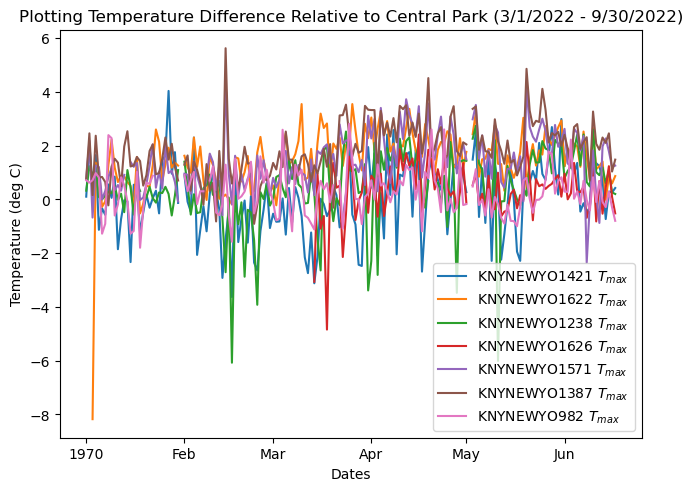

In [240]:
# df_combo.plot.scatter(x='DATE', y='T_dif'+wu_list[0])

#plotting central park weather data
fig = plt.figure(constrained_layout=True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[0]], markersize=2.5, label=r'KNYNEWYO'+wu_list[0]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
for i in range(len(wu_list)-1):
    ax.plot(df_combo['DATE'], df_combo['T_dif'+wu_list[i]], markersize=2.5, label=r'KNYNEWYO'+wu_list[i]+' $T_{max}$')  ##close to Central Park (uptown - Harlem))
    
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg C)")
# ax.set_ylim([20.0, 105.0])
ax.set_title('Plotting Temperature Difference Relative to Central Park (3/1/2022 - 9/30/2022)')
plt.legend(loc='lower right')
plt.show()
